# Viscosity Coefficients

## Prelude
In this notebook we will attempt to calculate the viscosity of the Yukawa OCP.

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/YOCP/input_files/yocp_viscosity.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/YOCP/YOCP_viscosity.ipynb).


In [1]:
# Import the usual libraries
%pylab
%matplotlib inline

import os
plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess


# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'yocp_viscosity.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# pre = PreProcess(input_file_name)
# pre.setup(read_yaml=True)
# pre.run()

In [3]:
# sim = Simulation(input_file_name)
# sim.setup(read_yaml=True)
# sim.run()

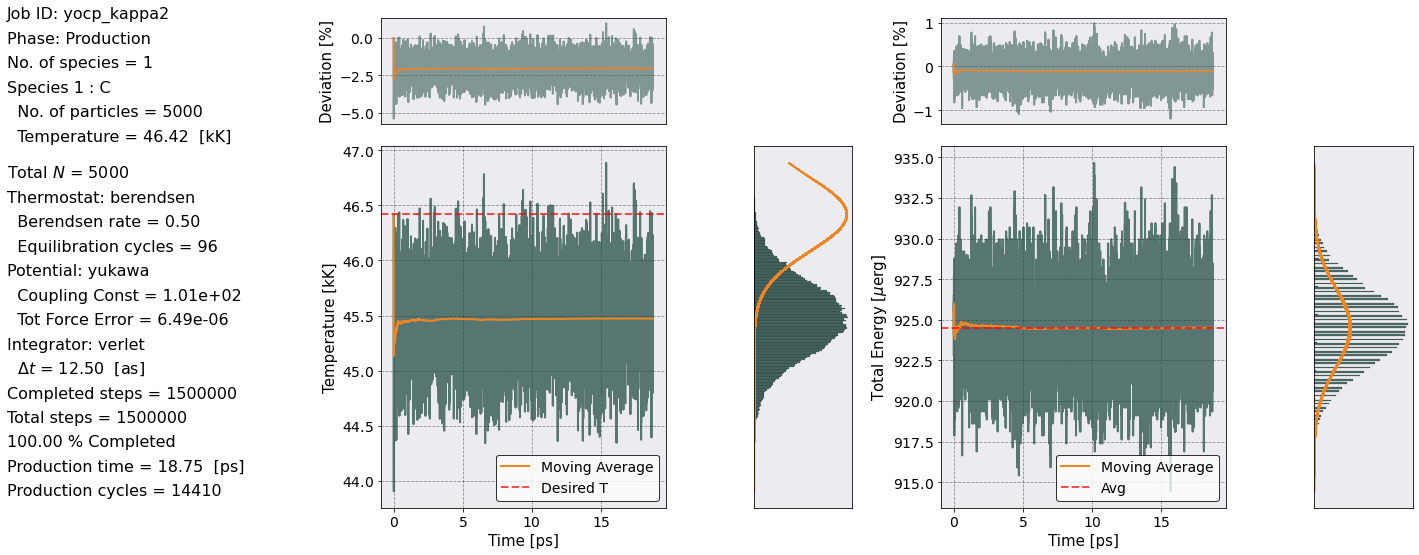

In [4]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)
postproc.parameters.verbose = True
postproc.therm.setup(postproc.parameters)
postproc.therm.temp_energy_plot(postproc)

## Pair Distribution Function

The first observable to calculate is always the RDF.

In [5]:
rdf = postproc.rdf
rdf.setup(postproc.parameters, no_slices=1 )
rdf.parse()


<AxesSubplot:xlabel='$r /a$'>

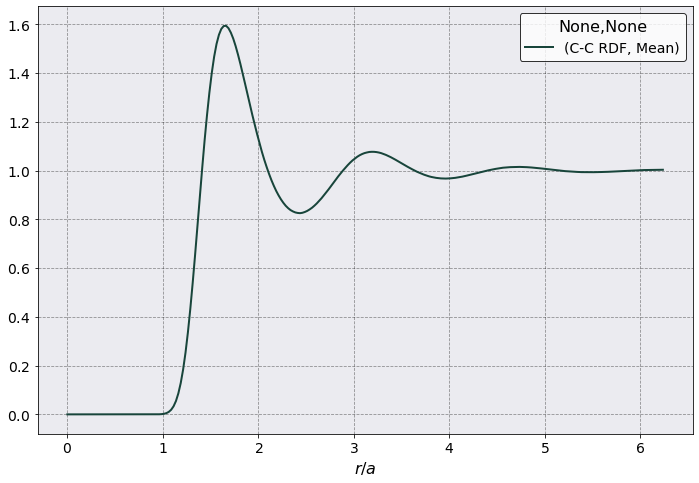

In [6]:
rdf.plot(scaling = rdf.a_ws, 
         y = ('C-C RDF', 'Mean'),
         xlabel = r'$r /a$')

In [7]:
from sarkas.tools.transport import TransportCoefficients
from sarkas.tools.observables import PressureTensor

## Pressure Tensor

The viscosity is obtained from the autocorrelation function of the Pressure Tensor $\overleftrightarrow{\mathcal P}$ whose elements are

\begin{equation}
\mathcal P_{\alpha\gamma}(t) = \frac{1}{V} \sum_{i}^{N} \left [ m_i v^{\alpha}_{i} v^{\gamma}_{i} -  \sum_{j > i} \frac{r_{ij}^{\alpha} r_{ij}^{\gamma} }{r_{ij}} \frac{d}{dr}\phi(r) \right ],
\end{equation}

where $r_{ij}^{\alpha}$ is the $\alpha$ component of the distance between particles $i$ and $j$. The first term is the kinetic term and the second term is the virial term, but it is often referred to as the potential contribution. The virial is calculated during the simulation phase and saved together with particles corrdinates. 

In order to check that our code are correct, let's verify some laws. 

The pressure of the system is calculated from $\mathcal P(t)= \frac1{3} {\rm Tr} \overleftrightarrow{\mathcal P}(t)$ and also from 

\begin{equation}
P = \frac{n}{\beta} - \frac{2\pi}{3} n^2 \int_0^{\infty} dr \, r^3 \frac{d\phi(r)}{dr} g(r)
\end{equation}

where $g(r)$ is the pair distribution function that we have already calculated.

Let's calculate the Pressure tensor and the pressure $\mathcal P$.

In [8]:
pt = PressureTensor()
pt.setup(postproc.parameters, no_slices = 2)
# pt.compute()
pt.parse()

As usual the data is saved in several dataframes. In this case we have 4 dataframes

* A dataframe for the values of each of the elements of the pressure tensor for each of the slices, `pt.dataframe_slices`
* A dataframe for the mean and std values of each of the elements of the pressure tensor, `pt.dataframe`
* A dataframe for the ACF of each pair $\langle \mathcal P_{\alpha\beta}(t)\mathcal P_{\mu\nu}(0) \rangle$ for each slice, `pt.dataframe_acf_slices`
* A dataframe for the mean and std of the ACF of each pair $\langle \mathcal P_{\alpha\beta}(t)\mathcal P_{\mu\nu}(0) \rangle$, `pt.dataframe_acf`

Let's look at `pt.dataframe` and at its columns

In [9]:
pt.dataframe

Time      Pressure               Delta Pressure                \
                 NaN          Mean           Std           Mean           Std   
0       0.000000e+00  1.481050e+13  4.475378e+09   9.640046e+08  4.624121e+09   
1       6.250000e-17  1.481062e+13  4.360531e+09   1.077576e+09  4.509274e+09   
2       1.250000e-16  1.481073e+13  4.238994e+09   1.189024e+09  4.387736e+09   
3       1.875000e-16  1.481084e+13  4.112669e+09   1.300868e+09  4.261411e+09   
4       2.500000e-16  1.481095e+13  3.982834e+09   1.412491e+09  4.131577e+09   
...              ...           ...           ...            ...           ...   
149995  9.374688e-12  1.481016e+13  4.676448e+09   6.174698e+08  4.527706e+09   
149996  9.374750e-12  1.481018e+13  4.712473e+09   6.394380e+08  4.563731e+09   
149997  9.374812e-12  1.481020e+13  4.744467e+09   6.613843e+08  4.595724e+09   
149998  9.374875e-12  1.481023e+13  4.768360e+09   6.851347e+08  4.619617e+09   
149999  9.374937e-12  1.481025e+13  4.787700e+09   7.087402e+08  4.638958e+09   

       Pressure Tensor Kinetic xx               Pressure Tensor Potential xx  \
                             Mean           Std                         Mean   
0                    7.093304e+11  1.803769e+10                 1.407423e+13   
1                    7.092128e+11  1.788308e+10                 1.407437e+13   
2                    7.091114e+11  1.771433e+10                 1.407450e+13   
3                    7.090262e+11  1.753208e+10                 1.407463e+13   
4                    7.089578e+11  1.733693e+10                 1.407475e+13   
...                           ...           ...                          ...   
149995               7.118162e+11  2.094178e+10                 1.409873e+13   
149996               7.118652e+11  2.120674e+10                 1.409889e+13   
149997               7.119236e+11  2.144853e+10                 1.409906e+13   
149998               7.119910e+11  2.166620e+10                 1.409922e+13   
149999               7.120667e+11  2.185886e+10                 1.409938e+13   

                     Pressure Tensor xx  ... Pressure Tensor Potential zy  \
                 Std               Mean  ...                         Mean   
0       3.070777e+10       1.478356e+13  ...                -1.349294e+10   
1       3.043084e+10       1.478358e+13  ...                -1.359784e+10   
2       3.012222e+10       1.478361e+13  ...                -1.368992e+10   
3       2.978323e+10       1.478365e+13  ...                -1.377276e+10   
4       2.941981e+10       1.478371e+13  ...                -1.384260e+10   
...              ...                ...  ...                          ...   
149995  3.950421e+09       1.481055e+13  ...                -9.425949e+09   
149996  4.123326e+09       1.481076e+13  ...                -9.394952e+09   
149997  4.318283e+09       1.481098e+13  ...                -9.343740e+09   
149998  4.541414e+09       1.481121e+13  ...                -9.272190e+09   
149999  4.789867e+09       1.481144e+13  ...                -9.179610e+09   

                     Pressure Tensor zy                \
                 Std               Mean           Std   
0       9.080726e+08       1.513634e+09  6.403260e+09   
1       7.774131e+08       1.428573e+09  6.230626e+09   
2       6.259734e+08       1.336832e+09  6.048696e+09   
3       4.507040e+08       1.235023e+09  5.853759e+09   
4       2.570485e+08       1.127174e+09  5.650556e+09   
...              ...                ...           ...   
149995  6.014705e+09      -5.177773e+09  2.743918e+09   
149996  6.262046e+09      -5.058588e+09  2.647215e+09   
149997  6.501897e+09      -4.937013e+09  2.541221e+09   
149998  6.732523e+09      -4.812951e+09  2.428042e+09   
149999  6.954353e+09      -4.685684e+09  2.307675e+09   

       Pressure Tensor Kinetic zz               Pressure Tensor Potential zz  \
                             Mean           Std                         Mean   
0                

Note that the Pressure $\mathcal P(t)$ is readily calculated and provided as a column of the dataframe.

Note also that there is a multitude of columns. This is because in dense plasmas it is useful to know the contribution of both the kinetic term and potential term separately, as such the columns of each dataframe contain the kinetic, the potential, and the total value of each $\mathcal P_{\alpha\beta}$ and their ACFs.

Let's plot the Pressure as a function of time

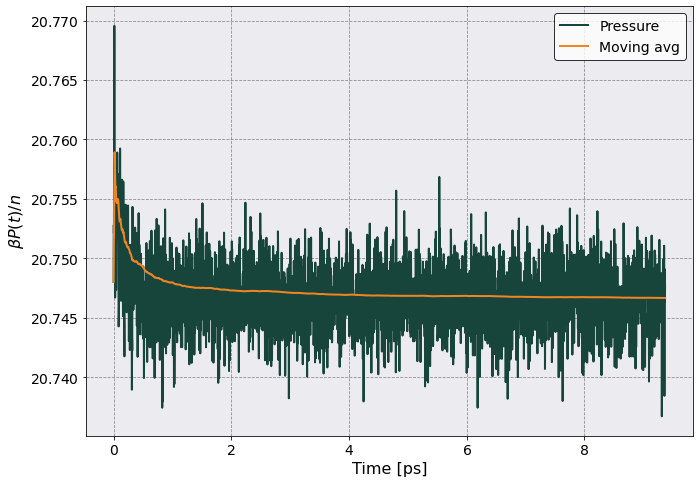

In [10]:
# Let's plot it
p_id = pt.total_num_density / postproc.therm.beta
ax = pt.plot( 
    scaling = (1e-12, p_id),
    y = ("Pressure", "Mean"),
    xlabel = "Time [ps]",
    ylabel = r"$ \beta P(t)/n$"
       )
ax.plot(pt.dataframe['Time']*1e12, pt.dataframe[('Pressure','Mean')].expanding().mean()/p_id )
ax.legend(['Pressure', 'Moving avg'])

## Pressure from RDF

Let's now calculate the pressure from the integral of the RDF. This is obtained from the method `compute_from_rdf` of the `Thermodynamics` object. 

Looking at the documentation of this [method](../../api/tools_subpckg/Thermodynamics_mthds/sarkas.tools.observables.Thermodynamics.compute_from_rdf.html) we notice that it returns five values:
the Hartree and correlational terms between species $A$ and $B$ and the ideal pressure $n k_B T$. 

The total pressure is given from the sum of the three terms and should be equal to the 

$$ P = n k_BT + P_{\rm Hartree} + P_{\rm Corr} = {\operatorname {Mean} } \left \{ \mathcal P(t) \right \} $$

In [11]:
nkT, _, _, p_h, p_c = postproc.therm.compute_from_rdf(rdf, postproc.potential)

P_rdf = nkT + p_h + p_c
P_trace = pt.dataframe[("Pressure", "Mean")].mean()

print("The relative difference between the two methods is = {:.2f} %".format((P_rdf[0] - P_trace)*100/P_rdf[0] ) )

The relative difference between the two methods is = 0.03 %


It seems that we have done a good job! 

### Sum rule

Let's now check that we have calculated the ACF correctly. The equal time ACFs of the elements of $\overleftrightarrow{\mathcal P}(t)$ obey the following sum rules

$$
\mathcal J_{zzzz}(0) = \frac 13 \sum_{\alpha}\left \langle \mathcal P_{\alpha\alpha}(0)\mathcal P_{\alpha\alpha}(0) \right \rangle  =  \frac{n}{\beta^2} \left [ 3 + \frac{2\beta}{15} I_1 + \frac \beta5 I_2 \right ] ,
$$ 
$$
\mathcal J_{zzxx}(0) = \frac 16 \sum_{\alpha} \sum_{\beta\neq\alpha} \left \langle \mathcal P_{\alpha\alpha}(0)\mathcal P_{\beta\beta}(0) \right \rangle = \frac{n}{\beta^2} \left [ 1 - \frac{2\beta}{5} I_1 + \frac \beta{15} I_2 \right ] ,
$$ 
$$
\mathcal J_{xyxy}(0) = \frac 16 \sum_{\alpha}\sum_{\beta \neq \alpha} \left \langle \mathcal P_{\alpha\beta}(0)\mathcal P_{\alpha\beta}(0) \right \rangle = \frac{n}{\beta^2} \left [ 1 + \frac{4\beta}{15} I_1 + \frac \beta{15} I_2 \right ] ,
$$ 

where

$$ 
I_1 = 2\pi n \int dr \, g(r) r^3 \frac{d\phi}{dr}, \quad I_2 = 2\pi n \int dr\, g(r) r^4 \frac{d^2\phi}{dr^2}.
$$

Notice that all three equal time ACF satisfy 

$$ \mathcal J_{zzzz}(0) - \mathcal J_{zzxx}(0) = 2 \mathcal J_{xyxy}(0) .$$

Let's look at the dataframe of the ACF first

In [12]:
pt.dataframe_acf

Time  Pressure ACF               Delta Pressure ACF  \
                 NaN          Mean           Std               Mean   
0       0.000000e+00  2.193225e+26  4.406888e+21       7.042465e+18   
1       6.250000e-17  2.193225e+26  4.406887e+21       7.039566e+18   
2       1.250000e-16  2.193225e+26  4.406876e+21       7.030938e+18   
3       1.875000e-16  2.193225e+26  4.406855e+21       7.016597e+18   
4       2.500000e-16  2.193225e+26  4.406825e+21       6.996570e+18   
...              ...           ...           ...                ...   
149995  9.374688e-12  2.193499e+26  7.464009e+21      -9.260680e+18   
149996  9.374750e-12  2.193492e+26  6.760933e+21      -9.466666e+18   
149997  9.374812e-12  2.193486e+26  6.052459e+21      -9.666614e+18   
149998  9.374875e-12  2.193479e+26  5.334349e+21      -9.857902e+18   
149999  9.374937e-12  2.193472e+26  4.626795e+21      -1.004232e+19   

                     Pressure Tensor Kinetic ACF xxxx                \
                 Std                             Mean           Std   
0       1.273591e+18                     5.099171e+23  2.827243e+20   
1       1.273605e+18                     5.099170e+23  2.827093e+20   
2       1.273617e+18                     5.099169e+23  2.826976e+20   
3       1.273627e+18                     5.099167e+23  2.826892e+20   
4       1.273635e+18                     5.099164e+23  2.826843e+20   
...              ...                              ...           ...   
149995  2.564085e+18                     5.046615e+23  2.590839e+21   
149996  2.228395e+18                     5.047103e+23  2.612042e+21   
149997  1.888858e+18                     5.047653e+23  2.630856e+21   
149998  1.544056e+18                     5.048264e+23  2.647229e+21   
149999  1.194677e+18                     5.048934e+23  2.661116e+21   

       Pressure Tensor Potential ACF xxxx                \
                                     Mean           Std   
0                            1.987219e+26  3.916734e+22   
1                            1.987219e+26  3.917093e+22   
2                            1.987219e+26  3.917447e+22   
3                            1.987219e+26  3.917796e+22   
4                            1.987219e+26  3.918140e+22   
...                                   ...           ...   
149995                       1.984372e+26  4.854286e+23   
149996                       1.984374e+26  4.891900e+23   
149997                       1.984376e+26  4.929383e+23   
149998                       1.984378e+26  4.966713e+23   
149999                       1.984380e+26  5.003741e+23   

       Pressure Tensor Kin-Pot ACF xxxx  ... Pressure Tensor Kinetic ACF zzzz  \
                                   Mean  ...                             Mean   
0                          1.006467e+25  ...                     5.096344e+23   
1                          1.006467e+25  ...                     5.096344e+23   
2                          1.006467e+25  ...                     5.096342e+23   
3                          1.006467e+25  ...                     5.096339e+23   
4                          1.006467e+25  ...                     5.096335e+23   
...                                 ...  ...                              ...   
149995                     1.002041e+25  ...                     5.131844e+23   
149996                     1.002078e+25  ...                     5.133477e+23   
149997                     1.002119e+25  ...                     5.135030e+23   
149998                     1.002164e+25  ...                     5.136500e+23   
149999                     1.002213e+25  ...                     5.137886e+23   

                     Pressure Tensor Potential ACF zzzz                \
                 Std                               Mean           Std   
0       8.893208e+20                       1.986865e+26  1.015599e+22   
1       8.893161e+20                       1.986865e+26  1.015870e+22   
2       8.893180e+20                       1.986865e+2

Notice that in this case we have many more columns since now we have the ACF of the kinetic-kinetic, kinetic-potential, potential-kinetic, potential-potential, and the total ACF of each pair of elements.

Let's verify the sum rules.

In [13]:
# Diagonal terms
column_zzzz = [
    ('Pressure Tensor ACF xxxx', 'Mean'),
     ('Pressure Tensor ACF yyyy', 'Mean'),
     ('Pressure Tensor ACF zzzz', 'Mean'),
]
J_zzzz_0 = pt.dataframe_acf[column_zzzz].iloc[0].mean()

# Cross-Diagonal Terms
column_zzxx = [
    ('Pressure Tensor ACF xxyy', 'Mean'),
    ('Pressure Tensor ACF xxzz', 'Mean'),
    ('Pressure Tensor ACF yyxx', 'Mean'),
    ('Pressure Tensor ACF yyzz', 'Mean'),
    ('Pressure Tensor ACF zzxx', 'Mean'),
    ('Pressure Tensor ACF zzyy', 'Mean'),
]
J_zzxx_0 = pt.dataframe_acf[column_zzxx].iloc[0].mean()

# Cross Off Diagonal terms
column_xyxy = [
    ('Pressure Tensor ACF xyxy', 'Mean'),
    ('Pressure Tensor ACF xzxz', 'Mean'),
    ('Pressure Tensor ACF yxyx', 'Mean'),
    ('Pressure Tensor ACF yzyz', 'Mean'),
    ('Pressure Tensor ACF zxzx', 'Mean'),
    ('Pressure Tensor ACF zyzy', 'Mean'),
]
J_xyxy_0 = pt.dataframe_acf[column_xyxy].iloc[0].mean()

# The units of J's are [Density *  Energy]^2

print('The isotropy condition : (J_zzzz_0 - J_zzxx_0 )/( 2*J_xyxy_0 ) = {:.4f}'.format( (J_zzzz_0 - J_zzxx_0)/(2.0 * J_xyxy_0)  ))

The isotropy condition : (J_zzzz_0 - J_zzxx_0 )/( 2*J_xyxy_0 ) = 0.9814


Not exactly 1 but pretty close.

Let's now verify the sum rules. These are calculated from the `pt.sum_rule` method

In [14]:
# These sigmas have units of n^2
sigma_zzzz, sigma_zzxx, sigma_xyxy  = pt.sum_rule(postproc.therm.beta, rdf, postproc.potential)


In [15]:
"{:.4e}, {:.4e}".format(J_zzzz_0, nkT**2)

'2.1932e+26, 5.0955e+23'

## Viscosity

The shear viscosity is calculated from the Green-Kubo relation

\begin{equation}
\eta = \frac{\beta V}{6} \sum_{\alpha} \sum_{\gamma \neq \alpha} \int_0^{\infty} dt \, \left \langle \mathcal P_{\alpha\gamma}(t) \mathcal P_{\alpha\gamma}(0) \right \rangle,
\end{equation}

where $\beta = 1/k_B T$, $\alpha,\gamma = {x, y, z}$ and $\mathcal J_{\alpha\gamma}(t)$ is the autocorrelation function of the $\alpha,\gamma$ element of the 

The bulk viscosity is given by a similar relation

\begin{equation}
\eta_V = \beta V \int_0^{\infty}dt \,  \left \langle \delta \mathcal P(t) \delta \mathcal P(0) \right \rangle,
\end{equation}

where

\begin{equation}
\delta \mathcal P(t) = \mathcal P(t) - \left \langle \mathcal P  \right \rangle
\end{equation}

is the deviation of the scalar pressure.

In [16]:
tc = TransportCoefficients(params = postproc.parameters, no_slices = 2)

In [18]:
tc.parse(observable = pt, tc_name = "Viscosities")
# tc.viscosities(pt,plot = True)

Data saved in: 
 Simulations/yocp_kappa2/PostProcessing/TransportCoefficients/Production/Viscosities_yocp_kappa2.h5
Simulations/yocp_kappa2/PostProcessing/TransportCoefficients/Production/Viscosities_slices_yocp_kappa2.h5

No. of slices = 2
No. dumps per slice = 30000
Time interval of autocorrelation function = 9.3750e-12 [s] ~ 7205 w_p T


In [34]:
acf_str = "Delta Pressure ACF"
acf_avg = pt.dataframe_acf[("Delta Pressure ACF", "Mean")]
acf_std = pt.dataframe_acf[("Delta Pressure ACF", "Std")]

pq = "Bulk Viscosity"
tc_avg = tc.viscosity_df[(pq, "Mean")]
tc_std = tc.viscosity_df[(pq, "Std")]

[(-0.5, 1000.0)]

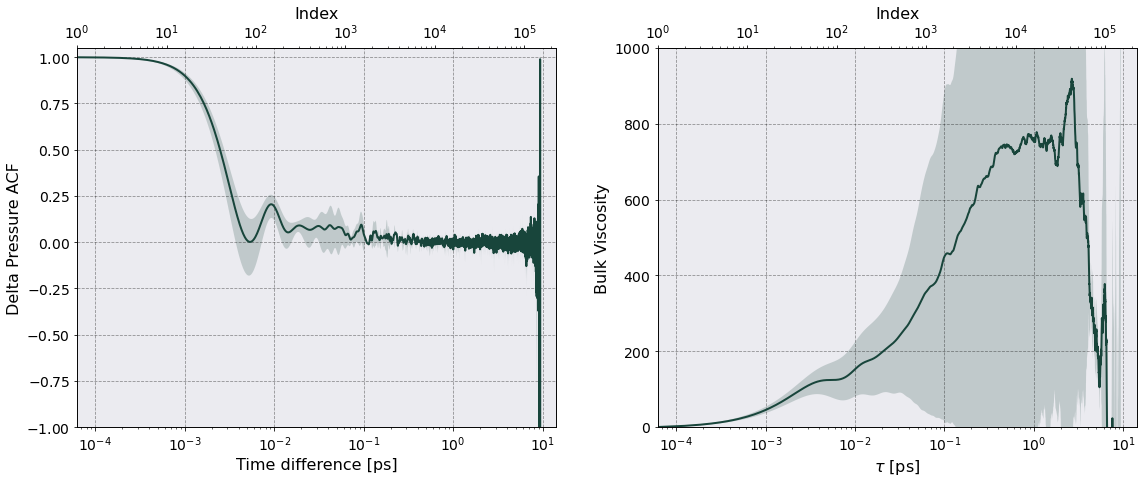

In [37]:
fig, axes = tc.plot_tc(
    time = tc.viscosity_df["Time"].iloc[:,0].to_numpy(),
    acf_data=np.column_stack((acf_avg, acf_std)),
    tc_data=np.column_stack((tc_avg, tc_std)),
    acf_name=acf_str,
    tc_name="Bulk Viscosity",
    figname="{}_Plot.png".format("Bulk Viscosity"),
    show=False
)
axes[0].set(ylim = (-1, 1.05))
axes[1].set(ylim = (-0.5, 1000 ) )

[Text(0.5, 0, 'Time difference $\\tau$ [ps]')]

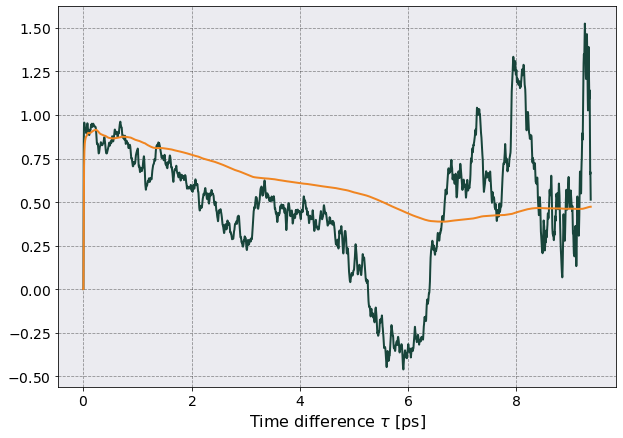

In [45]:
pq = "Shear Viscosity"
tc_avg = tc.viscosity_df[(pq, "Mean")]
tc_std = tc.viscosity_df[(pq, "Std")]


rescale = pt.total_plasma_frequency * pt.a_ws**2 * pt.species_masses[0] * pt.total_num_density * 0.0654
fig, ax = plt.subplots(1,1)
ax.plot(tc.viscosity_df["Time"].iloc[:,0].to_numpy()*1e12,
       tc_avg / rescale,
       label = r'$\mu$')

ax.fill_between(
    tc.viscosity_df["Time"].iloc[:,0].to_numpy()*1e12,
    (tc_avg - tc_std) / rescale,
    (tc_avg + tc_std) / rescale,
    alpha = 0.2)

ax.plot(tc.viscosity_df["Time"].iloc[:,0].to_numpy()*1e12,
       tc_avg.expanding().mean()/rescale,
       label = r'Moving avg')
ax.set(xlabel = r'Time difference $\tau$ [ps]')

I am missing a factor of 2 somewhere and can't figure out where.

To be continued.